最適化プログラムの開発

In [1]:
netlist_data = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   15.88ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   15.88ohm
B3                 4         2  pjjmod area=20
R3                 4         2   0.2ohm
.ends
*================================================================================


.subckt HFQ_bias            1  3  4
L1               1        2   20pH fcheck
L2               2        3   20pH fcheck
R1               2        4   130ohm
.ends

.subckt HFQ_bias_non        1  3  
L1               1        2   20pH fcheck
L2               2        3   20pH fcheck
.ends


.subckt DCHFQ 1 7 100
Rin                     1        2    #DCHFQR1(150)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(20)pH fcheck
X1       psquid         3        4
L3                      4        5    #DCHFQL2(4)pH fcheck
L4                      5        6    2.00pH fcheck
R1                      100      5    #DCHFQR2(100)ohm
X2       psquid         6        0
X3       JTL      6        7     100
.ends

.subckt DCHFQt 1 7 100
Rin                     1        2    #DCHFQR1(150)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(20)pH fcheck
X1       psquid         3        4
L3                      4        5    #DCHFQL2(4)pH fcheck
L4                      5        6    2.00pH fcheck
R1                      100      5    #DCHFQR2(100)ohm
X2       psquid         6        0
X3       JTL      6        7     100
.ends


.subckt JTL     1  5  100
L1               1  2   #JTLL1(18)pH fcheck
L2               2  3   #JTLL1(18)pH fcheck
L3               3  4   #JTLL1(18)pH fcheck
L4               4  5   #JTLL1(18)pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   #JTLR1(100)ohm
.ends



.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends


.subckt DFF 1 4 9 100
L1                   1  2  #DFFL1(10)pH fcheck  
X1       psquid      2  3
L2                   3  7  #@DFFL2(18)pH fcheck

L3                   4  5  #DFFL3(18)pH fcheck
L4                   5  6  #DFFL4(18)pH fcheck
X2       psquid      6  0
L5                   6  7  2pH  fcheck
R1                   100  7  #DFFR1(100)ohm
L6                   7  8  #DFFL6(10)pH fcheck
L7                   8  9  2pH fcheck
X3       psquid      9  0
.ends


*** top cell: 
Vin1                     1     0      PWL(0ps 0mV   360ps 0mV 370ps 25mV 470ps 25mV 480ps 0mV   860ps 0mV 870ps 25mV 970ps 25mV 980ps 0mV   1360ps 0mV 1370ps 25mV 1470ps 25mV 1480ps 0mV)
X0       DCHFQt        1     2  100
X1       JTL4          2     3  100
X2       JTL4          3     4  100

Vin2                     5     0      PWL(0ps 0mV   240ps 0mV 250ps 25mV 350ps 25mV 360ps 0mV   740ps 0mV 750ps 25mV 850ps 25mV 860ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X3       DCHFQt        5     6  100
X4       JTL4          6     7  100
X5       JTL4          7     8  100

X6       DFF           4     8  9 100
X7       JTL4          9     10  100
X8       JTL4          10    11  100


X9       psquid        11     0
R1                     11    12  8.32ohm
L1                     12     0  2pH fcheck
Vb                     100    0  pwl(0ps 0mV 100ps 1.2mV)



**netlis file
.tran 1.0ps 6000ps 0ps 1ps

.print phase B1|X1|X1|X5
.print phase B2|X1|X1|X5

.print phase B1|X1|X1|X2
.print phase B2|X1|X1|X2

.print phase B1|X1|X1|X8
.print phase B2|X1|X1|X8

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=200e-12
"""

In [2]:
# print(netlist_data)

In [3]:
import importlib
from optimize import data2
importlib.reload(data2)
# importlib.reload(Data) # モジュールの再読み込み
# import optimize
# .reload(optimize) # モジュールの再読み込み

data = data2.Data(netlist_data, True)

--- List of variables to optimize ---
        default value  fixed           text
char                                       
DCHFQR1     150   150  False  #DCHFQR1(150)
DCHFQL1      20    20  False   #DCHFQL1(20)
DCHFQL2       4     4  False    #DCHFQL2(4)
DCHFQR2     100   100  False  #DCHFQR2(100)
JTLL1        18    18  False     #JTLL1(18)
JTLR1       100   100  False    #JTLR1(100)
DFFL1        10    10  False     #DFFL1(10)
@DFFL2       18    18   True    #@DFFL2(18)
DFFL3        18    18  False     #DFFL3(18)
DFFL4        18    18  False     #DFFL4(18)
DFFR1       100   100  False    #DFFR1(100)
DFFL6        10    10  False     #DFFL6(10)


--- Period to calculate the initial value of bias ---
1e-10  ~  2e-10


--- SQUID used for judging the operation ---
[['P(B1|X1|X1|X5)', 'P(B2|X1|X1|X5)'], ['P(B1|X1|X1|X2)', 'P(B2|X1|X1|X2)'], ['P(B1|X1|X1|X8)', 'P(B2|X1|X1|X8)']]




default 値でのシュミレーション結果


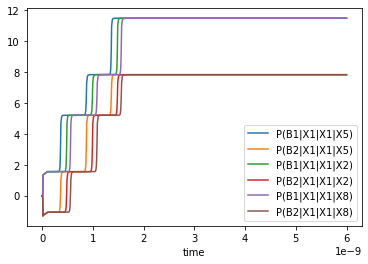

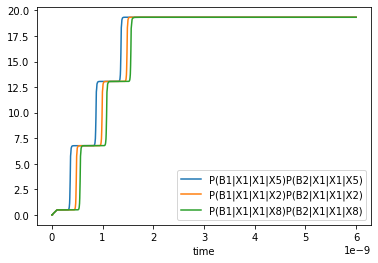

In [4]:
data.default_simulation(True)

In [16]:
import importlib
from optimize import optimize
importlib.reload(optimize)

op = optimize.Optimize(data)
op.margin()

,default,value,fixed,text,low(value),low(%),high(value),high(%)
DCHFQR1,150,150,False,#DCHFQR1(150),136.0000,-9.3,286.0,90.7
DCHFQL1,20,20,False,#DCHFQL1(20),3.1200,-84.0,22.0,10.0
DCHFQL2,4,4,False,#DCHFQL2(4),0.0156,-99.0,8.0,100.0
DCHFQR2,100,100,False,#DCHFQR2(100),76.9000,-23.0,200.0,100.0
JTLL1,18,18,False,#JTLL1(18),7.9500,-55.0,36.0,100.0
JTLR1,100,100,False,#JTLR1(100),66.8000,-33.0,188.0,88.0
DFFL1,10,10,False,#DFFL1(10),0.0390,-99.0,20.0,100.0
@DFFL2,18,18,True,#@DFFL2(18),0.0700,-99.0,36.0,100.0
DFFL3,18,18,False,#DFFL3(18),0.0700,-99.0,36.0,100.0
DFFL4,18,18,False,#DFFL4(18),0.0700,-99.0,36.0,100.0


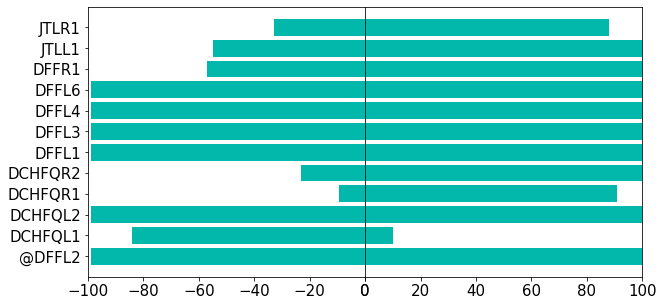

In [17]:
op.margin_plot()

In [13]:
# print(df_margin)

min_margin = 100
min_index = None
for index, srs in df_margin.iterrows():
    if not srs['fixed']:
        if abs(srs['low(%)']) < min_margin or abs(srs['high(%)']) < min_margin:
            min_margin = min(abs(srs['low(%)']), abs(srs['high(%)']))
            min_index = index

print(df_margin.loc[min_index])
print("Minimum margin = ", min_margin, "%")

default                  150
value                    150
fixed                  False
text           #DCHFQR1(150)
low(value)             136.0
low(%)                  -9.3
high(value)            286.0
high(%)                 90.7
Name: DCHFQR1, dtype: object
Minimum margin =  9.3 %
